
# Mariadb
## Edwin Andrés Acero Gutiérrez

Para esta tarea, se uso la base de datos: Sakila, la cuál se puede descargar de la página: [Bases de datos - MYSQL](https://dev.mysql.com/doc/index-other.html).

La base de datos de muestra de Sakila fue desarrollada inicialmente por Mike Hillyer, un ex miembro del equipo de documentación de MySQL AB, y está destinada a proporcionar un esquema estándar que se puede utilizar para ejemplos en libros, tutoriales, artículos, muestras, etc. La base de datos de muestra de Sakila también sirve para resaltar características de MySQL como Vistas, Procedimientos almacenados y Disparadores.

Mientras que la base de datos de muestra de Dell se diseñó para representar una tienda de DVD en línea, la base de datos de muestra de Sakila está diseñada para representar una tienda de alquiler de DVD. La base de datos de muestra de Sakila todavía toma prestados nombres de actores y películas de la base de datos de muestra de Dell.

## Estructura

En esta parte, se detalla la base de datos.

### 1.  Tablas de datos

*   La tabla de actores
*   La tabla de direcciones
*   La tabla de categorías
*   La tabla de la ciudad
*   La tabla de países
*   La tabla del cliente
*   La tabla de películas
*   La tabla películas_actor
*   La tabla películas_categoría
*   La tabla películas_texto
*   La tabla de inventario
*   La tabla de idiomas
*   La tabla de pagos
*   La tabla de alquiler
*   La tabla del personal
*   La tabla de la tienda

Por ejemplo, La tabla de actores enumera información para todos los actores. La tabla de actores se une a la tabla de películas mediante la tabla películas_actor.

En esta tabla, se tienen las variables: 

*   actor_id: Una clave principal sustituta que se utiliza para identificar de forma única a cada actor de la tabla.

*   first_name: El nombre del actor.

*   last_name: El apellido del actor.

*   last_update: Cuándo se creó la fila o se actualizó por última vez.

### 2. Vistas
*   Vista actor_info
*   Vista de lista de clientes
*   Vista de lista de películas
*   La vista nicer_but_slower_film_list
*   La vista salas_por_pelicula_categoría
*   La vista salas_por_tiendas
*   La vista staff_lista

Por ejemplo, La Vista actor_info proporciona una lista de todos los actores, incluidas las películas en las que han actuado, desglosados ​​por categoría.

La vista staff_lista incorpora datos de las películas, actores, categorías, películas_actor. 

### 3. Procedimientos almacenados

*   El procedimiento almacenado film_in_stock
*   El procedimiento almacenado film_not_in_stock
*   El procedimiento almacenado rewards_report

Por ejemplo, **el procedimiento almacenado film_in_stock** determina si hay copias de una película determinada en stock (existencia), en una tienda determinada.

**Parámetros**
*   p_film_id: ID de la película a comprobar, de la columna: film_id de la tabla de películas.

*   p_store_id: El ID de la tienda que se va a buscar, de la columna: store_id de la tabla de tiendas.

*   p_film_count: Parámetro que devuelve un recuento de las copias de la película en stock.

**Valores devueltos**
Este procedimiento produce una tabla de números de identificación de inventario para las copias de la película en existencia y devuelve (en el p_film_countparámetro) un recuento que indica el número de filas en esa tabla.

En la siguiente imagen se muestra el uso de la muestra del procedimiento almacenado.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


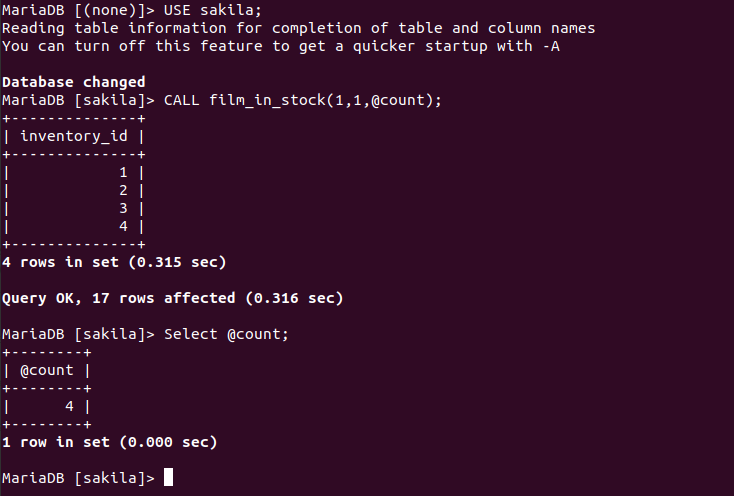

In [10]:
from IPython.display import Image
Image(filename='gdrive/My Drive/Colab Notebooks/sakila_1.PNG')

### 4. Funciones almacenadas
*  La función get_customer_balance
*  La función Inventory_held_by_customer
*  La función Inventory_in_stock

Por ejemplo, La función get_customer_balance devuelve la cantidad actual adeuda en la cuenta de un cliente específico.

**Parámetros**
*  p_customer_id: ID del cliente a verificar, de la columna: customer_id de la tabla de clientes.

*  p_effective_date: La fecha límite para los artículos que se aplicarán al saldo. Los alquileres, pagos, etc. posteriores a esta fecha no se cuentan.

**Valores devueltos**
Esta función devuelve la cantidad adeuda en la cuenta del cliente.

En la siguiente imagen se muestra el uso de la muestra de la función almacenado get_customer_balance.

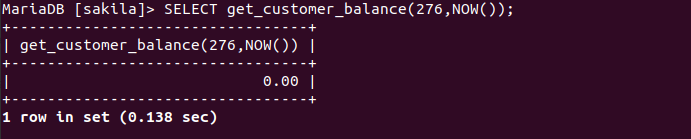

In [7]:
from IPython.display import Image
Image(filename='gdrive/My Drive/Colab Notebooks/sakila_2.PNG')

### 5. Triggers (Disparadores)
*  The customer_create_date Trigger
*  The payment_date Trigger
*  The rental_date Trigger
*  The ins_film Trigger
*  The upd_film Trigger
*  The del_film Trigger

Por ejemplo, El customer_create_date Trigger establece la columna: create_date de la tabla de clientes en la fecha y hora actuales a medida que se insertan las filas.

### 6. Diagrama E-R
el siguiente diagrama proporciona una descripción general de la estructura de la base de datos de muestra de Sakila. El archivo fuente del diagrama se realizó mediante MySQL Workbench.

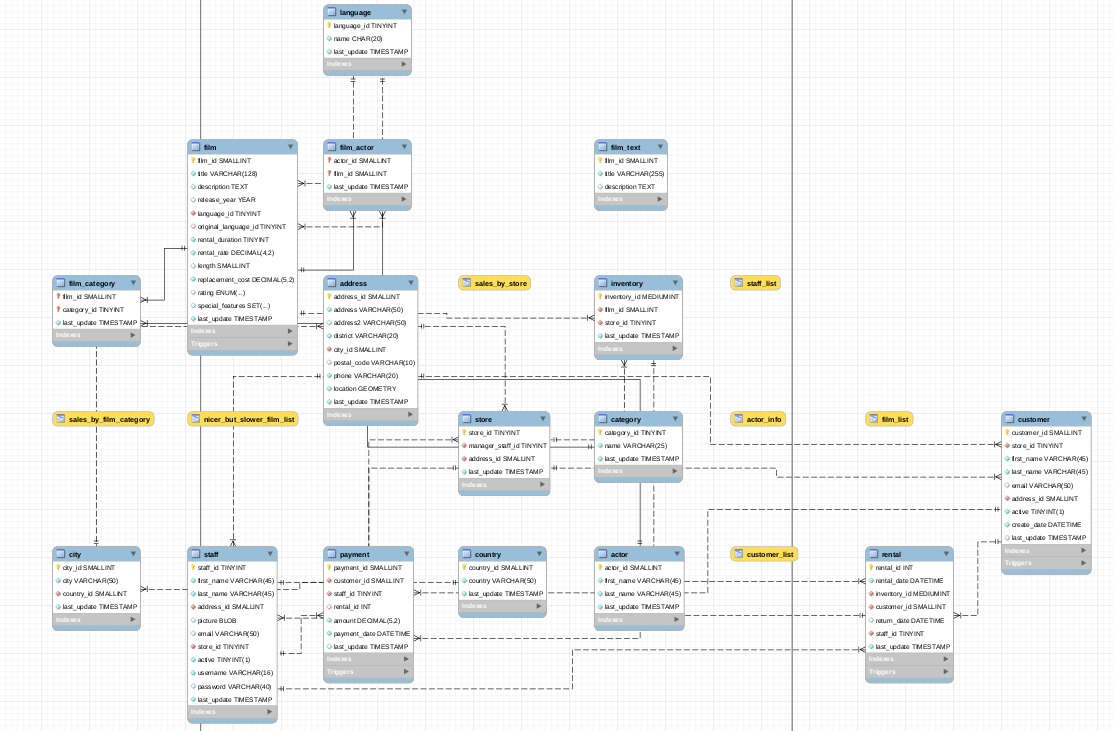

In [4]:
from IPython.display import Image
Image(filename='gdrive/My Drive/Colab Notebooks/diagrama E-R sakila.PNG')


### 6. Ejemplos de uso

#### Encuentra DVD vencidos
Muchas tiendas de DVD elaboran una lista diaria de alquileres vencidos para que se pueda contactar a los clientes y pedirles que devuelvan sus DVD vencidos.

Para crear dicha lista, se busca en la tabla de películas alquiladas con una fecha de devolución que sea NULL y cuya fecha de alquiler sea más antigua que la duración del alquiler especificada en la tabla de películas. Si es así, la película está vencida y debemos presentar el nombre de la película junto con el nombre del cliente y el número de teléfono.

El código es el siguiente: 


In [11]:
SELECT CONCAT(customer.last_name, ', ', customer.first_name) AS customer,
           address.phone, film.title
           FROM rental INNER JOIN customer ON rental.customer_id = customer.customer_id
           INNER JOIN address ON customer.address_id = address.address_id
           INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id
           INNER JOIN film ON inventory.film_id = film.film_id
           WHERE rental.return_date IS NULL
           AND rental_date + INTERVAL film.rental_duration DAY < CURRENT_DATE()
           ORDER BY title
           LIMIT 5;

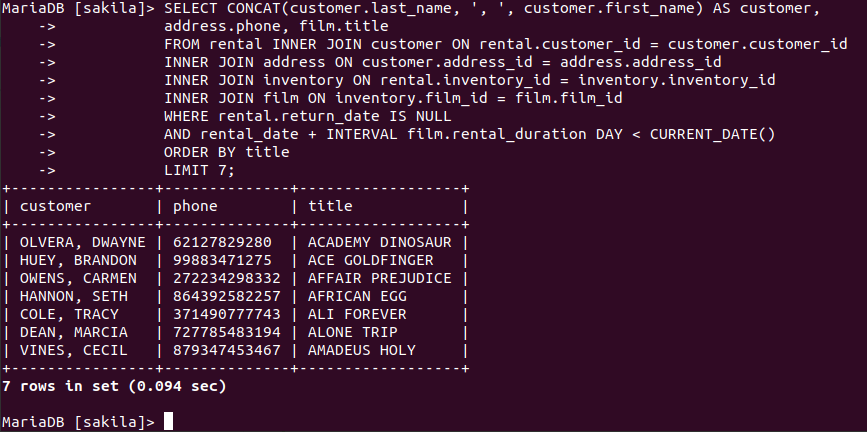

In [12]:
from IPython.display import Image
Image(filename='gdrive/My Drive/Colab Notebooks/sakila_3.PNG')